<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Statistics</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"> </p>
</div>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

def variableName(string):
    return string.replace(' ', '_')

def createVariables(listOfStrings):
    for string in listOfStrings:
        globals()[variableName(string)] = string

In [87]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [89]:
createVariables(data.keys())
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [90]:
for key in data.keys():
    print(f'There are {len(np.unique(data[key]))} distinct \'{key}\' values.')

There are 96 distinct 'fixed acidity' values.
There are 143 distinct 'volatile acidity' values.
There are 80 distinct 'citric acid' values.
There are 91 distinct 'residual sugar' values.
There are 153 distinct 'chlorides' values.
There are 60 distinct 'free sulfur dioxide' values.
There are 144 distinct 'total sulfur dioxide' values.
There are 436 distinct 'density' values.
There are 89 distinct 'pH' values.
There are 96 distinct 'sulphates' values.
There are 65 distinct 'alcohol' values.
There are 6 distinct 'quality' values.


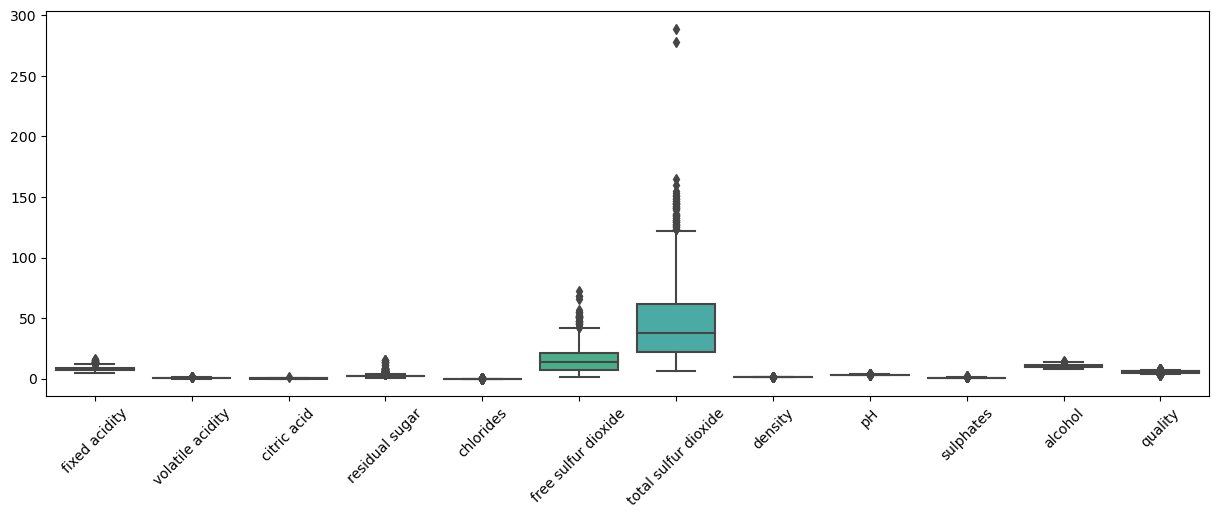

In [91]:
fig, ax = plt.subplots(1,figsize=(15, 5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [92]:
data = data[data[total_sulfur_dioxide]<200]

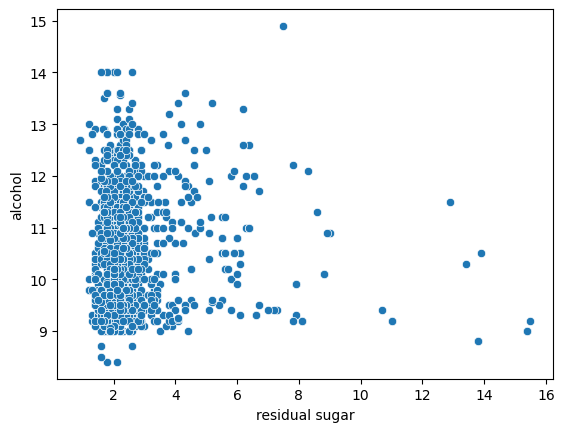

In [93]:
# visual data exploration
sns.scatterplot(x=data[residual_sugar], y=data[alcohol])
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


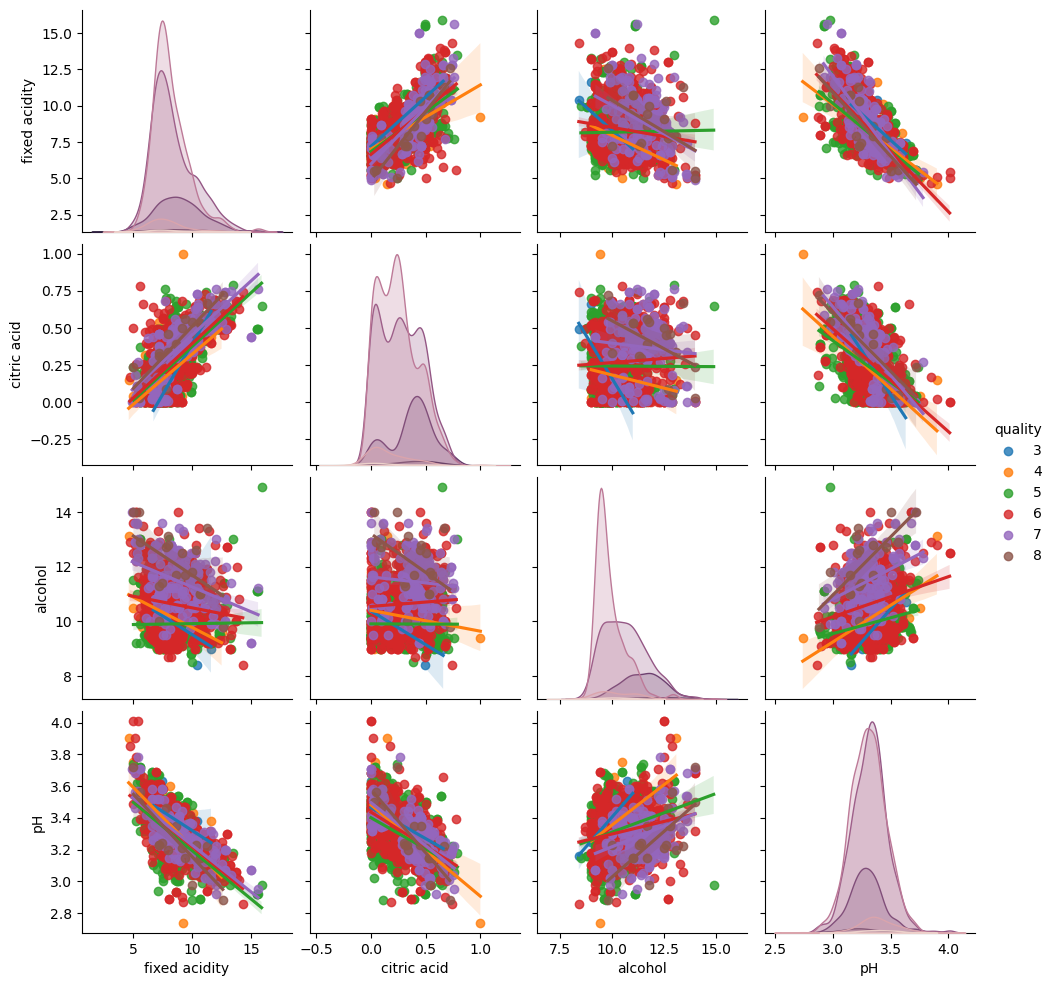

In [94]:
sns.pairplot(data[[fixed_acidity, citric_acid, alcohol, pH, quality]], kind='reg', hue=quality)
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">T-test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">Now we are performing a T-test, to find out whether there is a correlation between acidity and wine quality.</p>
</div>

TtestResult(statistic=5.141735208056272, pvalue=2.3127479460333114e-05, df=26.0)


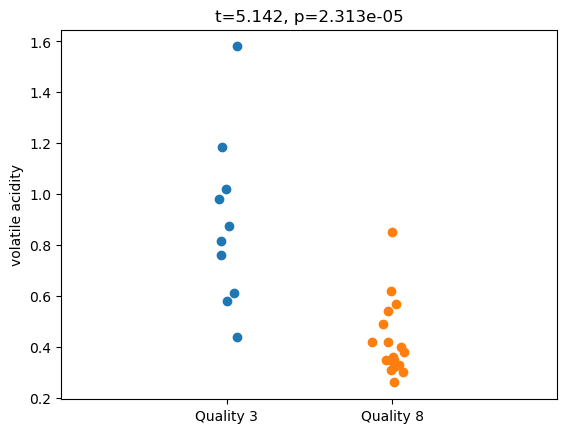

In [95]:
#extract data
x = data[volatile_acidity][data[quality] == 3]
y = data[volatile_acidity][data[quality] == 8]

# ttest
ttest = stats.ttest_ind(x, y) # in layman's terms, we are checking if the two samples' mean are different
print(ttest)

plt.plot(1+np.random.randn(len(x))*0.05, x, 'o')
plt.plot(2+np.random.randn(len(y))*0.05, y, 'o')
plt.xlim([0, 3])
plt.xticks([1, 2], labels=['Quality 3', 'Quality 8'])
plt.ylabel(volatile_acidity)
plt.title(f't={np.round(ttest[0], 3)}, p={np.round(ttest[1], 8)}')
plt.show()

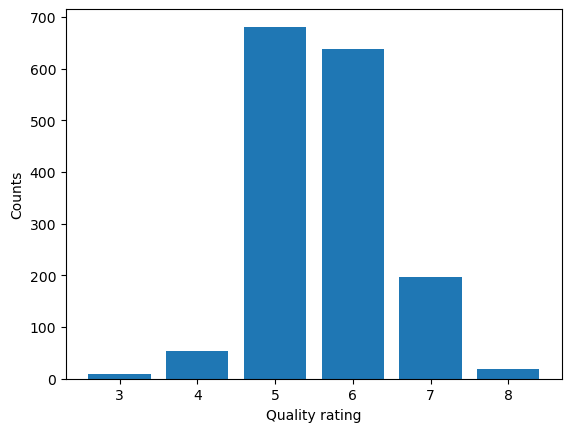

In [96]:
# quality histogram
qualityCounts = np.zeros(6) # we have 6 unique values
for i in range(3, 9):
    qualityCounts[i-3] = len(data[data[quality] == i])

plt.bar(range(3,9), qualityCounts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')
plt.show()

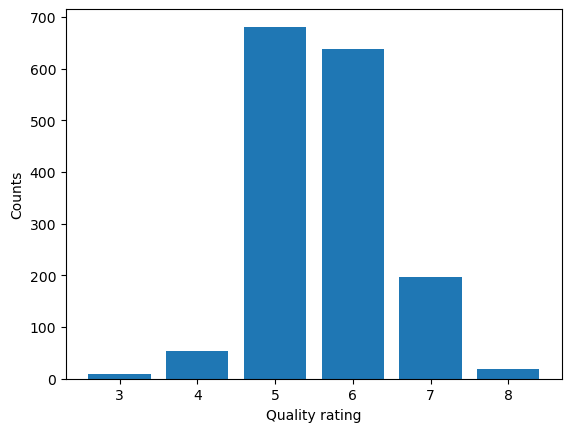

In [97]:
# alternative approach:
qualityCounts = data[quality].value_counts()
plt.bar(qualityCounts.keys(), qualityCounts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')
plt.show()

TtestResult(statistic=12.765504354353604, pvalue=1.215425804161403e-29, df=276.0)


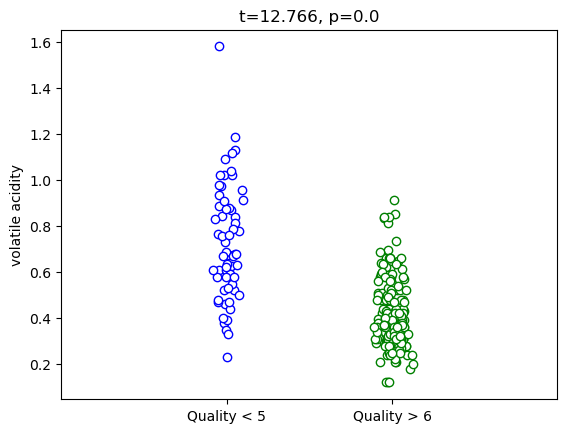

In [98]:
# Quality 3 and 8 have so little data, it gives unreliable response. So now we should repeat the ttest. (code is copy-pasted)
#extract data
x = data[volatile_acidity][data[quality] < 5]
y = data[volatile_acidity][data[quality] > 6]

# ttest
ttest = stats.ttest_ind(x, y) # in layman's terms, we are checking if the two samples' mean are different
print(ttest)

plt.plot(1+np.random.randn(len(x))*0.05, x, 'o', color='blue', markerfacecolor='white')
plt.plot(2+np.random.randn(len(y))*0.05, y, 'o', color='green', markerfacecolor='white')
plt.xlim([0, 3])
plt.xticks([1, 2], labels=['Quality < 5', 'Quality > 6'])
plt.ylabel(volatile_acidity)
plt.title(f't={np.round(ttest[0], 3)}, p={np.round(ttest[1], 12)}')
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Multiple regression</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">The point of a multiple regression analysis is to predict the variability of a variable using a number of other variables.</p>
</div>

In [99]:
dependentVariable = data[quality]
independentVariables = data.drop(labels=quality, axis=1)
independentVariables = sm.add_constant(independentVariables)

model = sm.OLS(endog=dependentVariable, exog=independentVariables).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.30e-145
Time:                        15:31:54   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


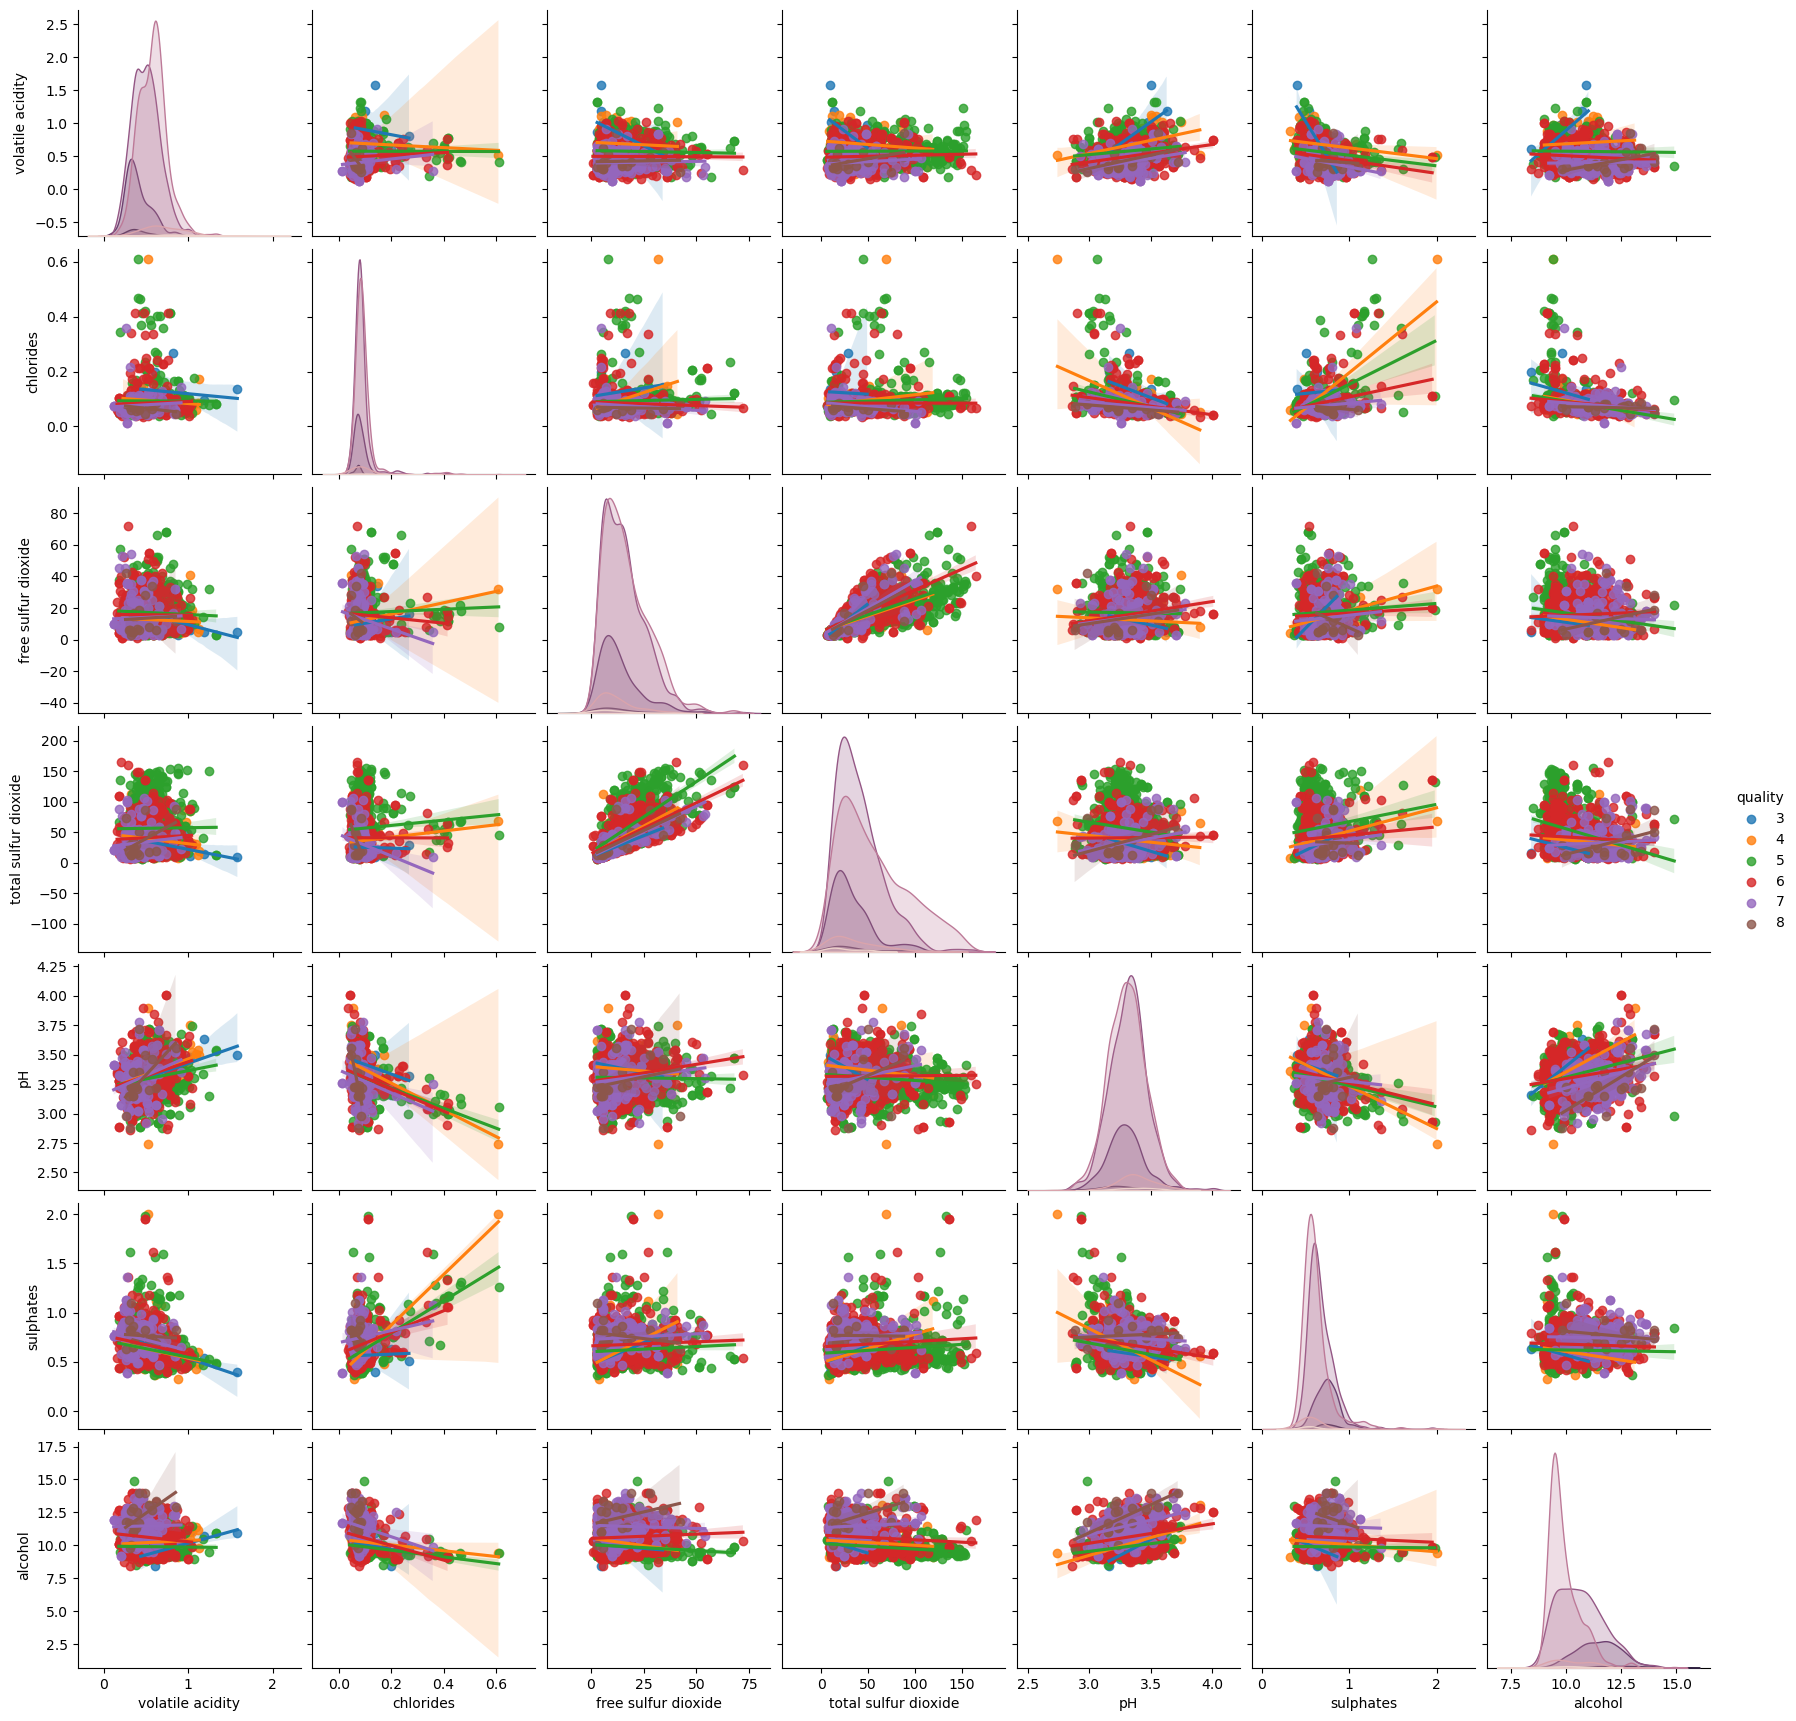

In [100]:
significant = list(model.pvalues[model.pvalues<.05].keys())
createVariables(significant)

[print(sig) for sig in significant];

significant.append(quality)
sns.pairplot(data[significant], kind='reg', hue=quality)
plt.show()

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Logistic regression</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">Logistic regression is when the variable we try to predict is logistic (true, false)</p>
</div>

In [101]:
meanQuality = np.mean(data[quality])
createVariables(['goodQuality'])
data[goodQuality] = data[quality] > meanQuality
data


C:\Users\user\AppData\Local\Temp\ipykernel_7580\410260821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[goodQuality] = data[quality] > meanQuality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodQuality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [102]:
Xcols = []
for key in data.keys():
    if key not in [quality, goodQuality]:
        Xcols.append(key)

In [103]:
model = sm.Logit(data[goodQuality], data[Xcols]).fit(method='newton')
model.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            goodQuality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                  0.2525
Time:                        15:32:12   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [104]:
significantLogic = list(model.pvalues[model.pvalues<.05].keys())
print('Significant prdictors from the logistic analysis')
for i in significantLogic:
    print(f"    {i}")
    
print('\nSignificant prdictors from the standard analysis')
significant.remove(quality)
for i in significant:
    print(f"    {i}")

Significant prdictors from the logistic analysis
    volatile acidity
    citric acid
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    sulphates
    alcohol

Significant prdictors from the standard analysis
    volatile acidity
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    pH
    sulphates
    alcohol
